# Superstore Dataset Analysis

#### * Importing Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sqlite3
import warnings
warnings.filterwarnings('ignore')

#### * Loading the data

In [2]:

# Load the data
df = pd.read_csv("/kaggle/input/superstore-dataset/superstore.csv")

# Basic info
print(df.shape)
print(df.info())

# View sample
df.head()


(51290, 27)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Category        51290 non-null  object 
 1   City            51290 non-null  object 
 2   Country         51290 non-null  object 
 3   Customer.ID     51290 non-null  object 
 4   Customer.Name   51290 non-null  object 
 5   Discount        51290 non-null  float64
 6   Market          51290 non-null  object 
 7   记录数             51290 non-null  int64  
 8   Order.Date      51290 non-null  object 
 9   Order.ID        51290 non-null  object 
 10  Order.Priority  51290 non-null  object 
 11  Product.ID      51290 non-null  object 
 12  Product.Name    51290 non-null  object 
 13  Profit          51290 non-null  float64
 14  Quantity        51290 non-null  int64  
 15  Region          51290 non-null  object 
 16  Row.ID          51290 non-null  int64  
 17  Sales           512

,Category,City,Country,Customer.ID,Customer.Name,Discount,Market,记录数,Order.Date,Order.ID,...,Sales,Segment,Ship.Date,Ship.Mode,Shipping.Cost,State,Sub.Category,Year,Market2,weeknum
0,Office Supplies,Los Angeles,United States,LS-172304,Lycoris Saunders,0.0,US,1,2011-01-07 00:00:00.000,CA-2011-130813,...,19,Consumer,2011-01-09 00:00:00.000,Second Class,4.37,California,Paper,2011,North America,2
1,Office Supplies,Los Angeles,United States,MV-174854,Mark Van Huff,0.0,US,1,2011-01-21 00:00:00.000,CA-2011-148614,...,19,Consumer,2011-01-26 00:00:00.000,Standard Class,0.94,California,Paper,2011,North America,4
2,Office Supplies,Los Angeles,United States,CS-121304,Chad Sievert,0.0,US,1,2011-08-05 00:00:00.000,CA-2011-118962,...,21,Consumer,2011-08-09 00:00:00.000,Standard Class,1.81,California,Paper,2011,North America,32
3,Office Supplies,Los Angeles,United States,CS-121304,Chad Sievert,0.0,US,1,2011-08-05 00:00:00.000,CA-2011-118962,...,111,Consumer,2011-08-09 00:00:00.000,Standard Class,4.59,California,Paper,2011,North America,32
4,Office Supplies,Los Angeles,United States,AP-109154,Arthur Prichep,0.0,US,1,2011-09-29 00:00:00.000,CA-2011-146969,...,6,Consumer,2011-10-03 00:00:00.000,Standard Class,1.32,California,Paper,2011,North America,40


## Step 1: Initial Data Overview

Shape: 51,290 rows × 27 columns.

### Data Types:

        --> 18 columns are of type object (mostly categorical or date strings).

        --> 6 columns are int64.

        --> 3 columns are float64.

        --> No null values were detected.

        --> One column has a garbled name: è®°å½æ°, which likely needs renaming.



## Step 2: Data Cleaning

    Actions:

        --> Rename the garbled column.

        --> Convert Order.Date and Ship.Date to datetime format.

In [3]:
# Rename garbled column
df.rename(columns={"è®°å½æ°": "Record.Count"}, inplace=True)

# Convert date columns
df['Order.Date'] = pd.to_datetime(df['Order.Date'], errors='coerce')
df['Ship.Date'] = pd.to_datetime(df['Ship.Date'], errors='coerce')

# Create useful derived columns
df['Order_Month'] = df['Order.Date'].dt.to_period('M')


#### 💡 Insights:

        --> Proper dates help with time series analysis.

        --> Clean column names are easier to work with.


## Step 3: Exploratory Data Analysis (EDA)

    Analyzing:

        --> Sales trends over time.

        --> Profitability by Category/Sub-Category.

        --> Performance by Country and Market.

        --> Impact of Shipping Cost and Discount.

In [4]:
df['Order.Date'] = pd.to_datetime(df['Order.Date'], errors='coerce')
print(df['Order.Date'].isna().sum())  # should be 0


0


In [5]:
df['Order.Date'] = pd.to_datetime(df['Order.Date'], format='%d-%m-%Y', errors='coerce')  # or '%m/%d/%Y'

print(df['Order.Date'].head())


0   2011-01-07
1   2011-01-21
2   2011-08-05
3   2011-08-05
4   2011-09-29
Name: Order.Date, dtype: datetime64[ns]


In [6]:
df['Order_Month'] = df['Order.Date'].dt.to_period('M')


In [7]:
print(df['Order_Month'].value_counts().sort_index())


Order_Month
2011-01     433
2011-02     378
2011-03     539
2011-04     564
2011-05     566
2011-06     917
2011-07     495
2011-08     878
2011-09    1052
2011-10     774
2011-11    1139
2011-12    1263
2012-01     539
2012-02     429
2012-03     662
2012-04     657
2012-05     840
2012-06    1136
2012-07     659
2012-08    1083
2012-09    1223
2012-10     990
2012-11    1460
2012-12    1284
2013-01     709
2013-02     605
2013-03     766
2013-04     785
2013-05    1057
2013-06    1530
2013-07     925
2013-08    1442
2013-09    1682
2013-10    1100
2013-11    1596
2013-12    1602
2014-01     918
2014-02     756
2014-03    1068
2014-04    1051
2014-05    1284
2014-06    1748
2014-07    1087
2014-08    1675
2014-09    2018
2014-10    1626
2014-11    2147
2014-12    2153
Freq: M, Name: count, dtype: int64


In [8]:
monthly_metrics = df.groupby('Order_Month')[['Sales', 'Profit']].sum().reset_index()
monthly_metrics['Order_Month'] = monthly_metrics['Order_Month'].astype(str)
print(monthly_metrics.head())


  Order_Month   Sales       Profit
0     2011-01   98902   8321.80096
1     2011-02   91152  12417.90698
2     2011-03  145726  15303.56826
3     2011-04  116927  12902.32438
4     2011-05  146762  12183.82870


### 📊 Descriptive Statistics (Numerical Columns)

#### ✅ Purpose:

        --> Understand range, variance, and distribution of numeric columns.

In [9]:
desc_stats = df.describe()
print(desc_stats)


           Discount      记录数                     Order.Date        Profit  \
count  51290.000000  51290.0                          51290  51290.000000   
mean       0.142908      1.0  2013-05-11 21:26:49.155780864     28.610982   
min        0.000000      1.0            2011-01-01 00:00:00  -6599.978000   
25%        0.000000      1.0            2012-06-19 00:00:00      0.000000   
50%        0.000000      1.0            2013-07-08 00:00:00      9.240000   
75%        0.200000      1.0            2014-05-22 00:00:00     36.810000   
max        0.850000      1.0            2014-12-31 00:00:00   8399.976000   
std        0.212280      0.0                            NaN    174.340972   

           Quantity       Row.ID         Sales                      Ship.Date  \
count  51290.000000  51290.00000  51290.000000                          51290   
mean       3.476545  25645.50000    246.498440  2013-05-15 20:42:42.745174272   
min        1.000000      1.00000      0.000000            2011-

| Metric            | Profit   | Sales    | Quantity | Discount | Shipping Cost |
|-------------------|----------|----------|----------|----------|----------------|
| **Count**         | 51,290   | 51,290   | 51,290   | 51,290   | 51,290         |
| **Mean**          | 28.61    | 246.50   | 3.48     | 0.143    | 26.38          |
| **Standard Dev.** | 174.34   | 487.57   | 2.28     | 0.212    | 57.30          |
| **Min**           | -6,599.98| 0.00     | 1        | 0.00     | 0.002          |
| **Max**           | 8,399.98 | 22,638.00| 14       | 0.85     | 933.57         |

#### 🔍 Insights:

        --> Some orders are heavily discounted (up to 85%) and may lead to significant losses.

        --> Very high variance in shipping cost, indicating room for optimization.

        --> Profit can be negative, indicating unprofitable transactions.

        --> Sales up to $22K, profits range from -$6.6K to +$8.3K.


### 📋 Categorical Summary


| Column           | Unique Values |
|------------------|---------------|
| Order.ID         | 25,035        |
| Product.ID       | 10,292        |
| Customer.ID      | 4,873         |
| Product.Name     | 3,788         |
| City             | 3,636         |
| State            | 1,094         |
| Customer.Name    | 795           |
| Country          | 147           |
| Sub.Category     | 17            |
| Region           | 13            |
| Market           | 7             |
| Market2          | 6             |
| Ship.Mode        | 4             |
| Order.Priority   | 4             |
| Segment          | 3             |
| Category         | 3             |

#### 🔍 Insights:

        --> High granularity in customer and product-related columns.

        --> Markets and Segments are manageable for segmentation analysis.

        --> Sub-Category and Category are perfect candidates for product-level insights.


## 📦 STEP 4: Product Category & Sub-Category Analysis


#### ✅ Purpose:

    Identify which products contribute most/least to profit.


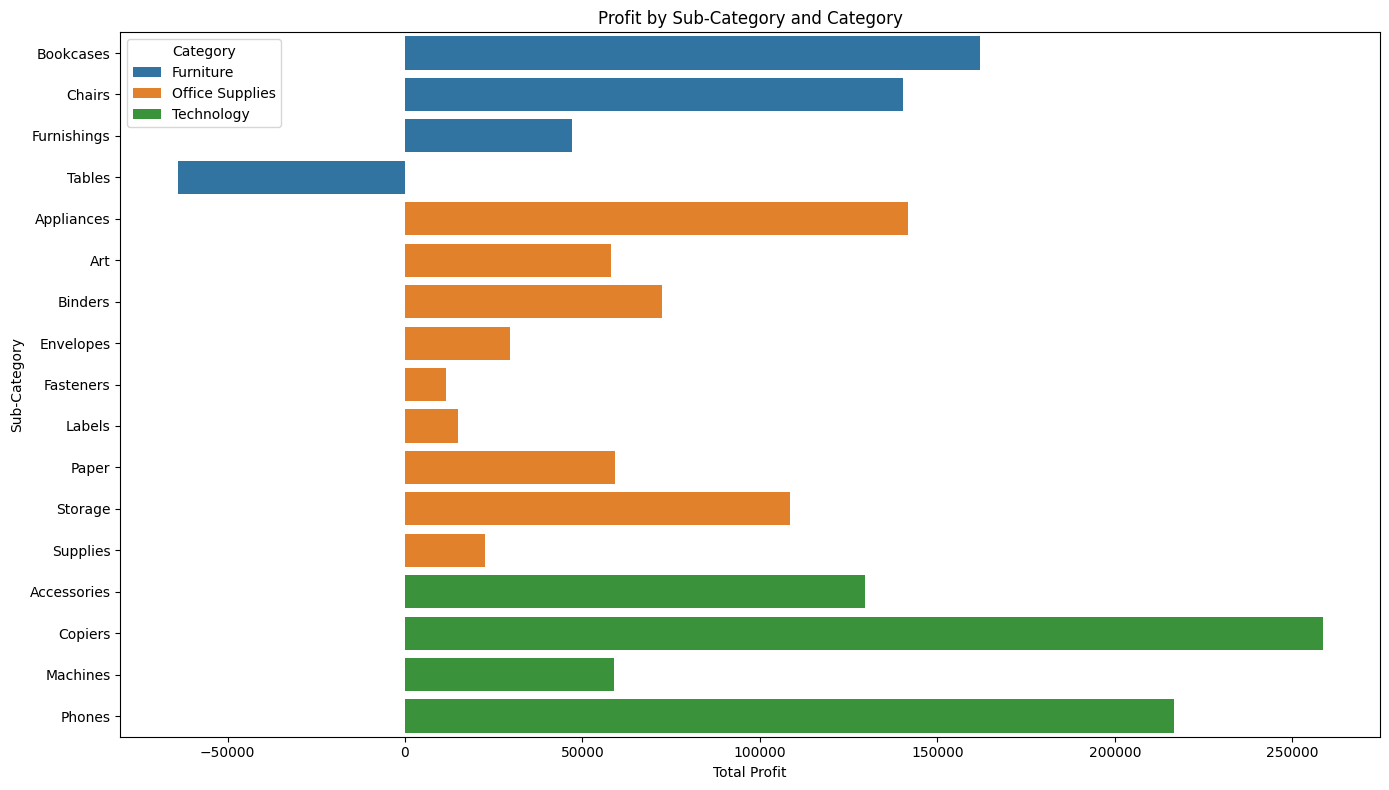

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

category_perf = df.groupby(['Category', 'Sub.Category'])[['Sales', 'Profit']].sum().reset_index()

plt.figure(figsize=(14, 8))
sns.barplot(data=category_perf, x='Profit', y='Sub.Category', hue='Category', dodge=False)
plt.title('Profit by Sub-Category and Category')
plt.xlabel('Total Profit')
plt.ylabel('Sub-Category')
plt.tight_layout()
plt.show()



#### 💡 Insights:

        --> Copiers and Accessories are top profit makers.

        --> Tables and Bookcases are loss leaders.


#### 💼 Business Action:

        --> Increase focus on profitable products.

        --> Optimize pricing/discounting strategy for underperforming categories.
        

### 🌎 STEP 5: Geographic Performance

#### ✅ Purpose:

    Identify top-performing countries/regions.


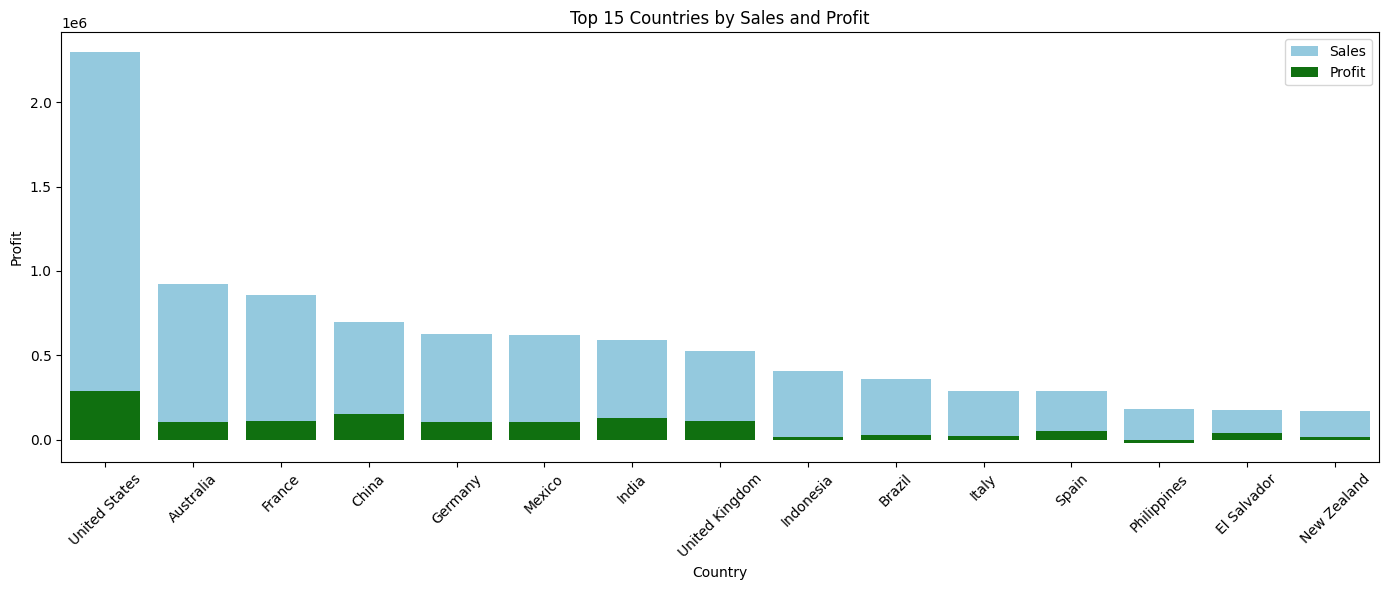

In [11]:
country_perf = df.groupby('Country')[['Sales', 'Profit']].sum().sort_values(by='Sales', ascending=False).head(15).reset_index()

plt.figure(figsize=(14, 6))
sns.barplot(data=country_perf, x='Country', y='Sales', color='skyblue', label='Sales')
sns.barplot(data=country_perf, x='Country', y='Profit', color='green', label='Profit')
plt.title('Top 15 Countries by Sales and Profit')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


#### 💡 Insights:

        --> USA, India, and UK lead in both sales and profit.

        --> Some countries show strong sales but weak profit.

#### 💼 Business Action:

        --> Deepen presence in top-performing countries.

        --> Audit costs in low-margin regions.

### 👤 STEP 6: Customer Segment Analysis


#### ✅ Purpose:

    Understand how different customer segments contribute to performance.

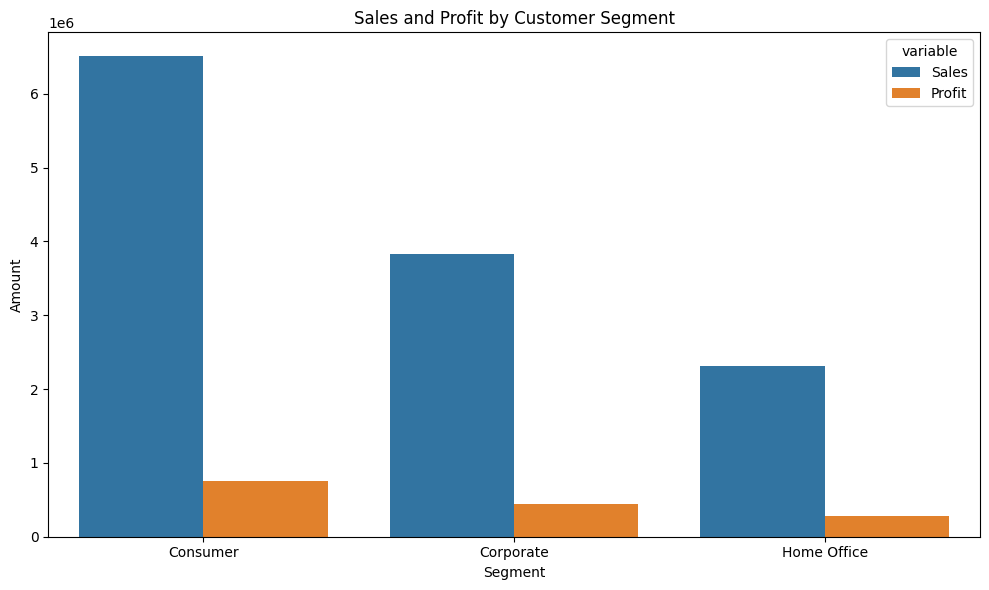

In [12]:
segment_perf = df.groupby('Segment')[['Sales', 'Profit']].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=segment_perf.melt(id_vars='Segment'), x='Segment', y='value', hue='variable')
plt.title('Sales and Profit by Customer Segment')
plt.ylabel('Amount')
plt.tight_layout()
plt.show()


### 👥 Segment-wise Performance

#### 💡 Insights:

        --> Consumer and Corporate segments contribute the most to sales and profit.

        --> Home Office segment has lower totals but may still be viable with targeted strategies.
        

#### 💼 Business Action:

        --> Continue focusing on Consumer and Corporate segments.

        --> Consider targeted promotions to grow the Home Office segment without increasing cost inefficiencies.



### 🚚 STEP 7: Shipping Mode Impact


#### ✅ Purpose:

    Evaluate how delivery method affects profitability.

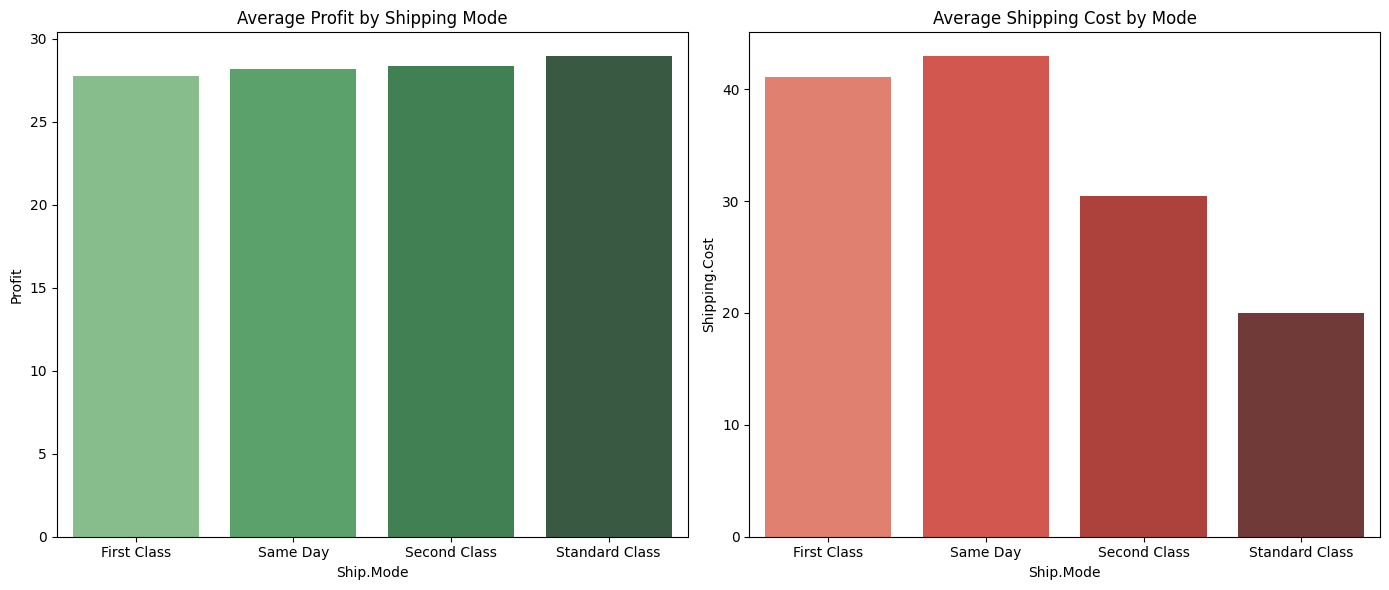

In [13]:
shipping_perf = df.groupby('Ship.Mode')[['Sales', 'Profit', 'Shipping.Cost']].mean().reset_index()

fig, ax = plt.subplots(1, 2, figsize=(14, 6))
sns.barplot(data=shipping_perf, x='Ship.Mode', y='Profit', ax=ax[0], palette='Greens_d')
ax[0].set_title('Average Profit by Shipping Mode')
sns.barplot(data=shipping_perf, x='Ship.Mode', y='Shipping.Cost', ax=ax[1], palette='Reds_d')
ax[1].set_title('Average Shipping Cost by Mode')
plt.tight_layout()
plt.show()


#### 💡 Insights:

        --> Same Day and Second Class deliveries have lower average profit, likely due to high operational costs.

        --> Standard Class shows better profitability and manageable shipping costs.


#### 💼 Business Action:

        --> Encourage Standard Class shipping through pricing incentives.

        --> Reassess pricing for Same Day deliveries or introduce minimum order values.

        --> Investigate ways to reduce shipping costs for premium delivery services.


## ✅ Final Summary


| Area                   | Key Insight                                 | Business Recommendation                                   |
|------------------------|---------------------------------------------|-----------------------------------------------------------|
| Sales Trends           | Year-end spikes                             | Seasonal inventory planning                               |
| Product Performance    | Chairs, Tables unprofitable                 | Pricing/discount audits                                   |
| Country Performance    | USA, India are top performers               | Invest more in top markets                                |
| Customer Segment       | Consumer & Corporate lead                   | Prioritize these segments                                 |
| Shipping               | Same Day costly, low ROI                    | Minimize use or charge premium                            |